<a href="https://colab.research.google.com/github/priyanshuranjan7509/Rainfll-prediction-project/blob/main/Copy_of_BIHAR_RAIN_PREDICTION_MODEL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sub-division_rainfall_act_dep_1901-2015.csv to sub-division_rainfall_act_dep_1901-2015.csv


In [5]:
india_rainfall_data_df = pd.read_csv(io.BytesIO(uploaded['sub-division_rainfall_act_dep_1901-2015.csv']))
india_rainfall_data_df

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,ANDAMAN & NICOBAR ISLANDS,1901-2015,Mean,49.2,27.6,30.0,72.2,355.6,471.4,397.5,400.5,431.3,289.5,233.0,153.3,2911.0,76.8,457.8,1700.7,675.8
1,ANDAMAN & NICOBAR ISLANDS,1901-2015,Standard deviation,71.3,38.8,43.6,66.8,151.2,147.0,151.9,142.6,146.7,99.4,119.4,129.5,395.9,81.1,176.8,286.3,199.0
2,ANDAMAN & NICOBAR ISLANDS,1901-2015,Coefficient of variation,144.9,140.4,145.5,92.5,42.5,31.2,38.2,35.6,34.0,34.3,51.2,84.5,13.6,105.6,38.6,16.8,29.4
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
4,ANDAMAN & NICOBAR ISLANDS,1901,Percentage departure,-0.1,215.9,-2.6,-96.8,48.7,9.8,-8.2,20.1,-22.9,34.2,139.5,-78.1,15.9,77.5,22.4,-0.3,45.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12451,WEST UTTAR PRADESH,2014,Percentage departure,177.6,66.4,103.9,-14.0,-11.2,-71.4,-39.1,-68.2,-43.5,-50.3,-100.0,127.5,-41.8,121.6,31.2,-53.5,-24.0
12452,WEST UTTAR PRADESH,2014,No. of districts,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN
12453,WEST UTTAR PRADESH,2015,Actual,31.6,7.2,66.8,21.0,8.1,72.0,194.2,143.5,26.5,6.9,2.0,3.0,582.7,38.8,95.9,436.1,11.9
12454,WEST UTTAR PRADESH,2015,Percentage departure,81.6,-59.4,501.7,238.5,-34.9,-6.4,-22.1,-43.7,-82.3,-76.3,-52.0,-57.7,-30.3,10.6,222.7,-40.3,-70.6


In [6]:
india_rainfall_data_df=india_rainfall_data_df[india_rainfall_data_df.Parameter=="Actual"]
india_rainfall_data_df.rename(columns = {'JF':'Jan-Feb', 'MAM':'Mar-May','JJAS':'Jun-Sep','OND':'Oct-Dec'}, inplace = True)
india_rainfall_data_df= india_rainfall_data_df.fillna(india_rainfall_data_df.mean())
india_rainfall_data_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
6,ANDAMAN & NICOBAR ISLANDS,1902,Actual,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
9,ANDAMAN & NICOBAR ISLANDS,1903,Actual,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
12,ANDAMAN & NICOBAR ISLANDS,1904,Actual,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
15,ANDAMAN & NICOBAR ISLANDS,1905,Actual,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,WEST UTTAR PRADESH,2011,Actual,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5,777.4,12.5,36.3,725.9,2.7
12444,WEST UTTAR PRADESH,2012,Actual,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0,389.6,14.5,6.4,366.0,2.7
12447,WEST UTTAR PRADESH,2013,Actual,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9,932.8,89.9,7.2,763.8,71.8
12450,WEST UTTAR PRADESH,2014,Actual,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3,486.9,77.7,39.0,339.4,30.8


In [7]:
Bihar_rainfall_data_df=india_rainfall_data_df[india_rainfall_data_df['SUBDIVISION']=='BIHAR']
Bihar_rainfall_data_df

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
978,BIHAR,1901,Actual,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1,952.3,71.4,78.6,786.7,15.6
981,BIHAR,1902,Actual,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0,1206.2,5.2,107.9,1063.4,29.6
984,BIHAR,1903,Actual,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0,1016.3,10.0,34.9,824.4,147.1
987,BIHAR,1904,Actual,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8,1269.5,7.9,127.4,1021.8,112.4
990,BIHAR,1905,Actual,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6,1498.5,46.1,131.4,1308.8,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,BIHAR,2011,Actual,4.2,7.7,9.2,23.9,74.5,211.0,241.1,278.7,234.1,10.0,2.0,0.9,1097.1,11.8,107.6,964.8,12.9
1311,BIHAR,2012,Actual,18.1,2.7,7.3,20.4,18.8,96.2,354.0,240.4,233.8,34.3,6.4,0.0,1032.4,20.9,46.5,924.4,40.6
1314,BIHAR,2013,Actual,5.1,22.6,0.6,32.3,89.5,183.3,182.0,213.6,143.3,197.1,0.4,0.0,1069.9,27.7,122.4,722.2,197.5
1317,BIHAR,2014,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,1061.0,50.5,112.9,848.6,49.0


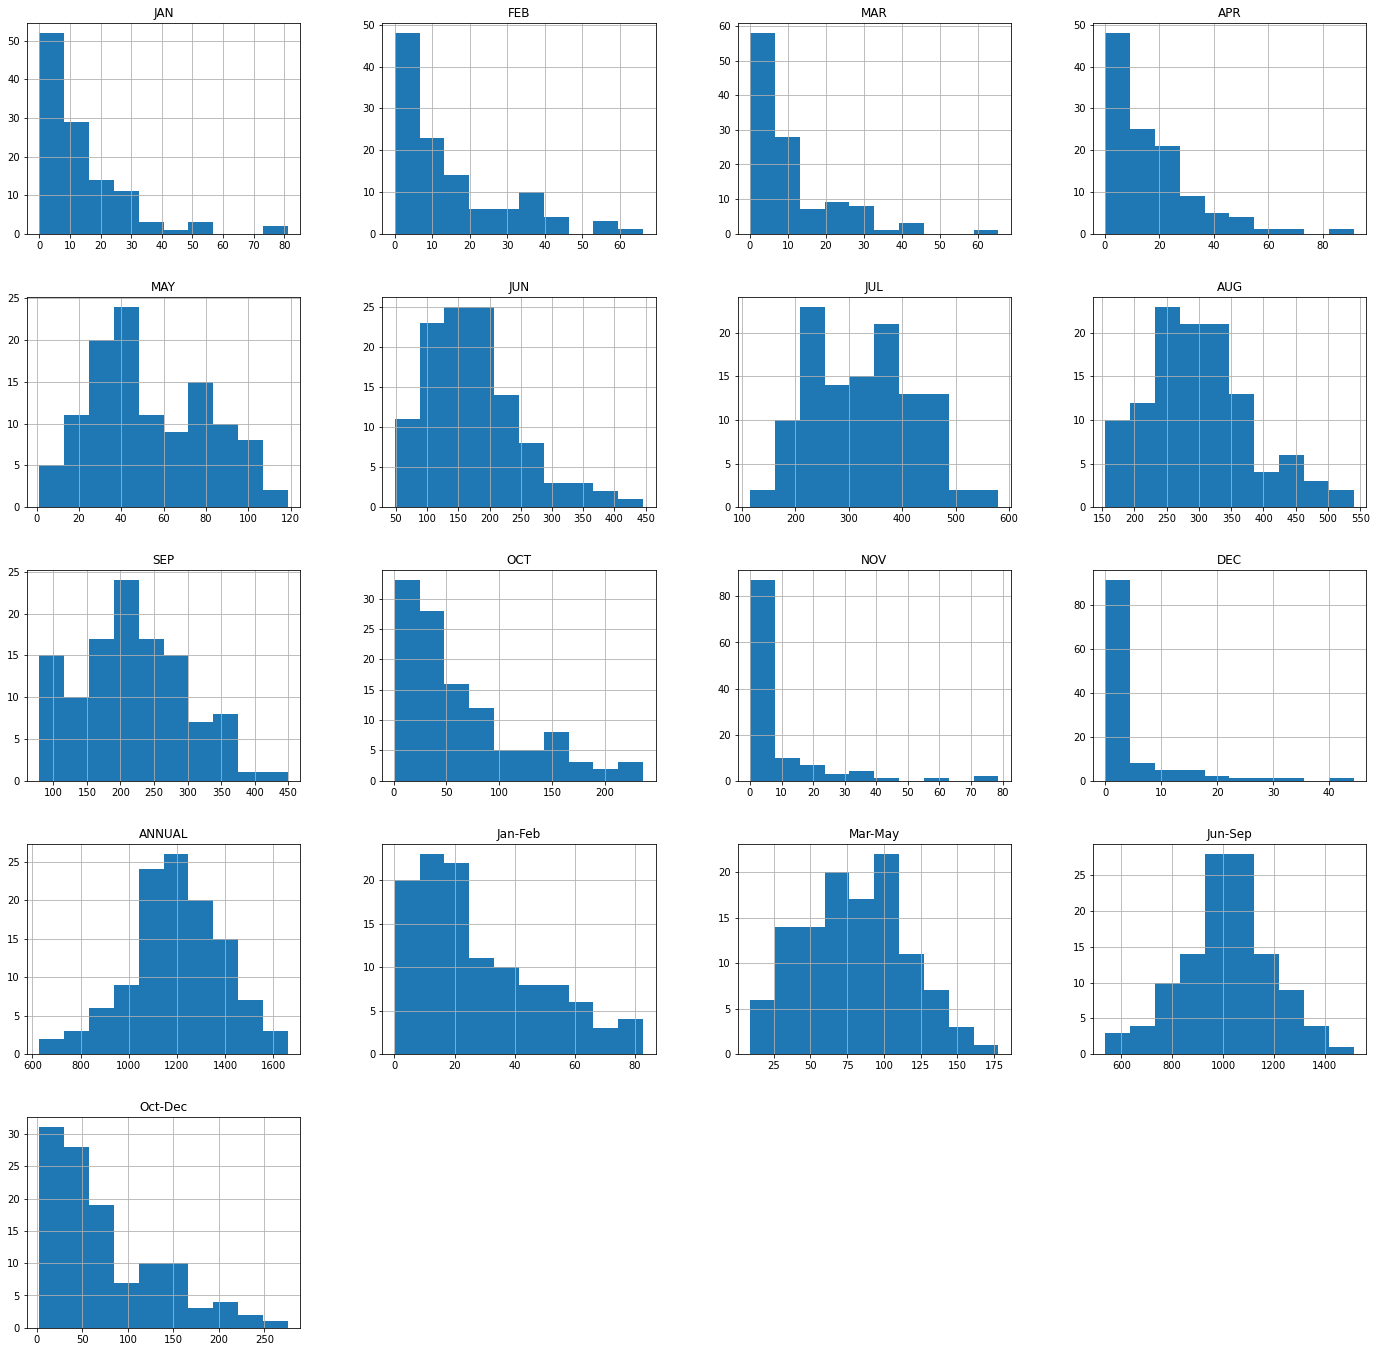

In [8]:
Bihar_rainfall_data_df.hist(figsize=(24,24));

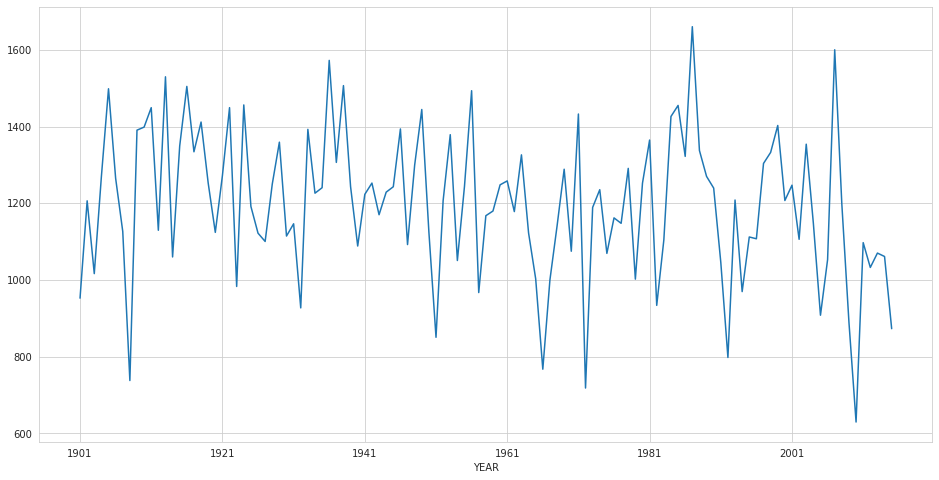

In [17]:
Bihar_rainfall_data_df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(16,8));
sns.set_style("whitegrid")

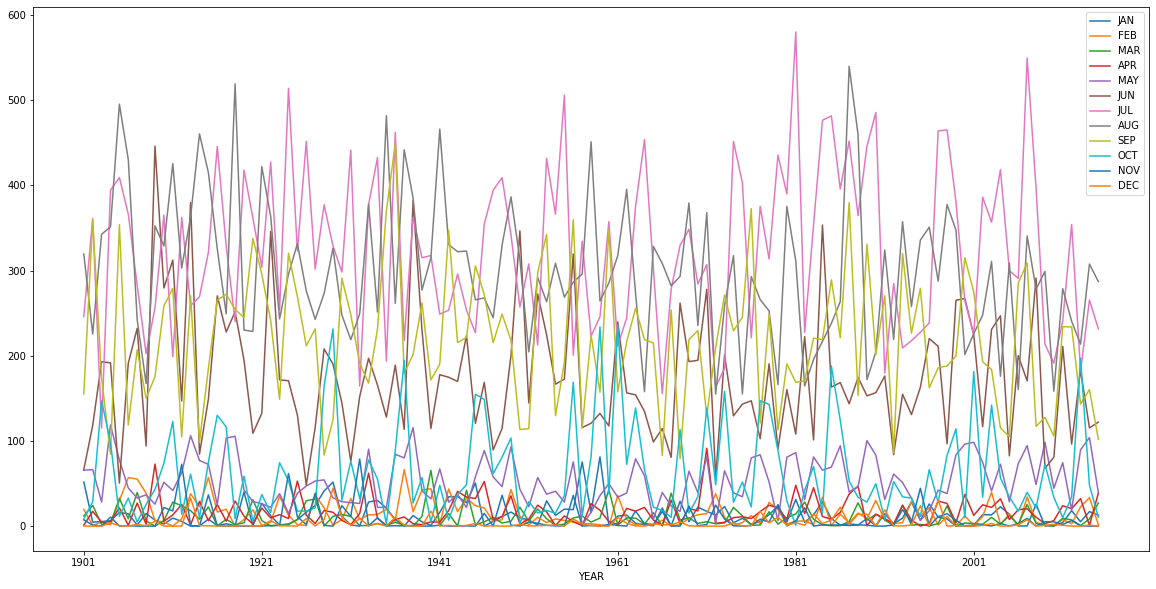

In [13]:
Bihar_rainfall_data_df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(20,10));

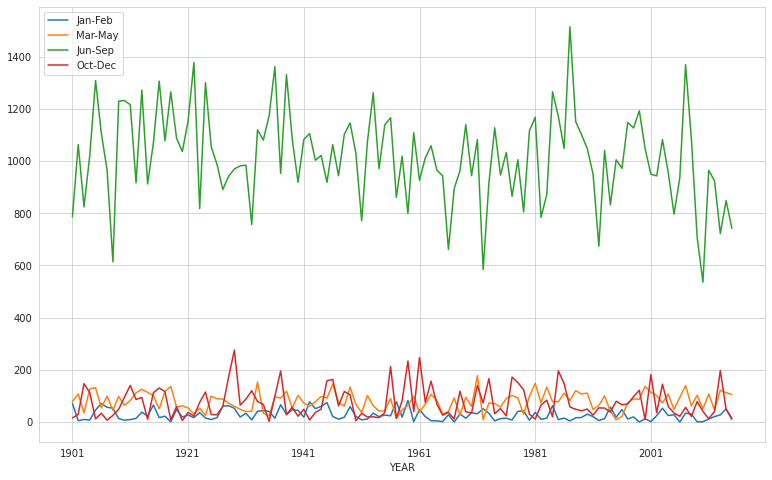

In [16]:
Bihar_rainfall_data_df[['YEAR','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));
sns.set_style("whitegrid")

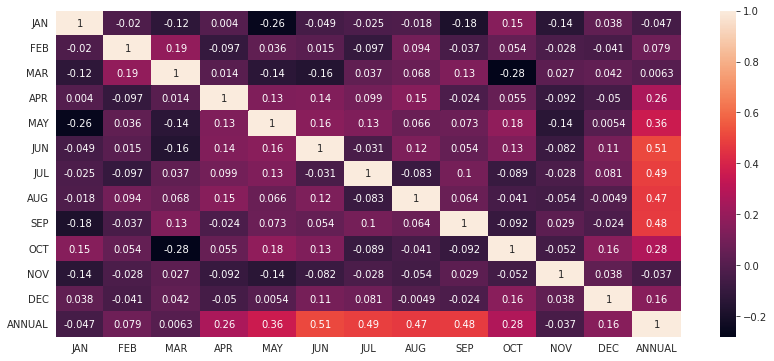

In [31]:
plt.figure(figsize=(14,6))
sns.heatmap(Bihar_rainfall_data_df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

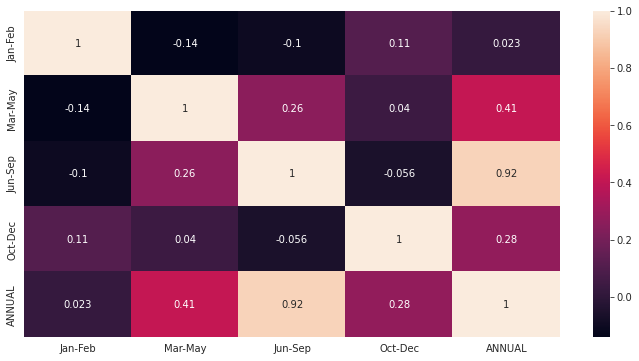

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(Bihar_rainfall_data_df[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

In [29]:
df2=Bihar_rainfall_data_df
df2.shape
df2

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
978,BIHAR,1901,Actual,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1,952.3,71.4,78.6,786.7,15.6
981,BIHAR,1902,Actual,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0,1206.2,5.2,107.9,1063.4,29.6
984,BIHAR,1903,Actual,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0,1016.3,10.0,34.9,824.4,147.1
987,BIHAR,1904,Actual,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8,1269.5,7.9,127.4,1021.8,112.4
990,BIHAR,1905,Actual,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6,1498.5,46.1,131.4,1308.8,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,BIHAR,2011,Actual,4.2,7.7,9.2,23.9,74.5,211.0,241.1,278.7,234.1,10.0,2.0,0.9,1097.1,11.8,107.6,964.8,12.9
1311,BIHAR,2012,Actual,18.1,2.7,7.3,20.4,18.8,96.2,354.0,240.4,233.8,34.3,6.4,0.0,1032.4,20.9,46.5,924.4,40.6
1314,BIHAR,2013,Actual,5.1,22.6,0.6,32.3,89.5,183.3,182.0,213.6,143.3,197.1,0.4,0.0,1069.9,27.7,122.4,722.2,197.5
1317,BIHAR,2014,Actual,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,1061.0,50.5,112.9,848.6,49.0


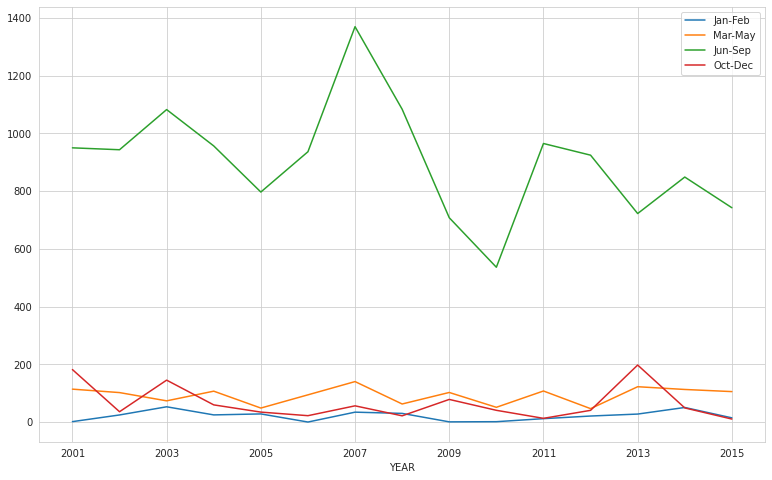

In [22]:
#Last 10 year trend of Monthwise rainfall
df2=df2.tail(15)
df2[['YEAR','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));
sns.set_style("whitegrid")

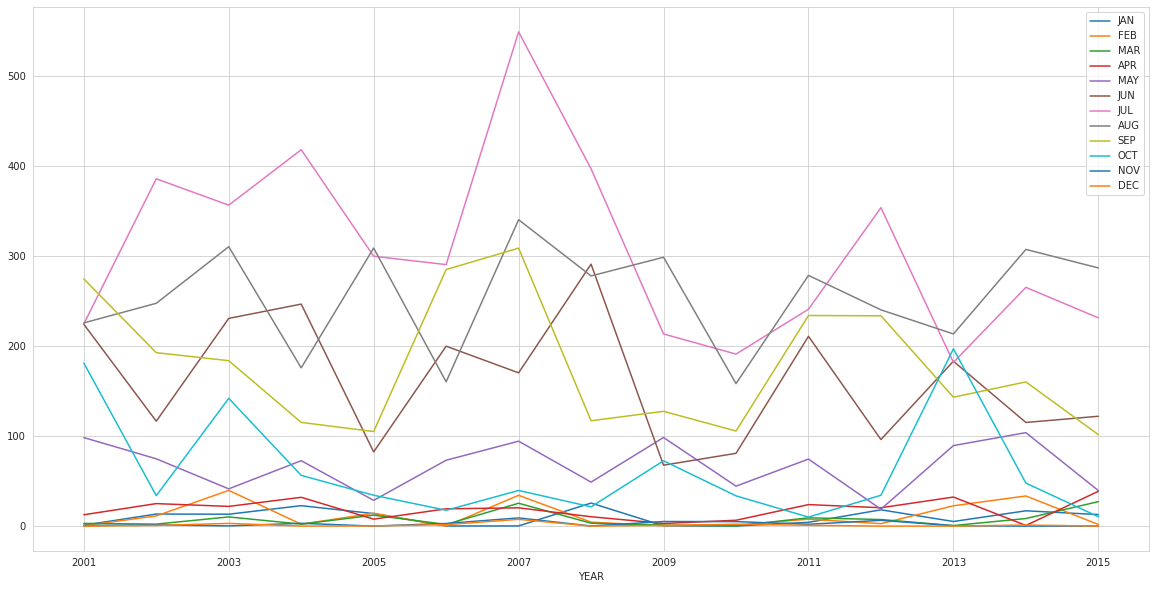

In [26]:
df2[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(20,10));

In [30]:
X=[]
Y=[]
for i in range(0,111):
   jan=[df2.iloc[i]['JAN'],df2.iloc[i+1]['JAN'],df2.iloc[i+2]['JAN']];
   feb=[df2.iloc[i]['FEB'],df2.iloc[i+1]['FEB'],df2.iloc[i+2]['FEB']];
   mar=[df2.iloc[i]['MAR'],df2.iloc[i+1]['MAR'],df2.iloc[i+2]['MAR']];
   apr=[df2.iloc[i]['APR'],df2.iloc[i+1]['APR'],df2.iloc[i+2]['APR']];
   may=[df2.iloc[i]['MAY'],df2.iloc[i+1]['MAY'],df2.iloc[i+2]['JUN']];
   jun=[df2.iloc[i]['JUN'],df2.iloc[i+1]['JUN'],df2.iloc[i+2]['JAN']];
   jul=[df2.iloc[i]['JUL'],df2.iloc[i+1]['JUL'],df2.iloc[i+2]['JUL']];
   aug=[df2.iloc[i]['AUG'],df2.iloc[i+1]['AUG'],df2.iloc[i+2]['AUG']];
   sep=[df2.iloc[i]['SEP'],df2.iloc[i+1]['SEP'],df2.iloc[i+2]['SEP']];
   oct=[df2.iloc[i]['OCT'],df2.iloc[i+1]['OCT'],df2.iloc[i+2]['OCT']];
   nov=[df2.iloc[i]['NOV'],df2.iloc[i+1]['NOV'],df2.iloc[i+2]['NOV']];
   dec=[df2.iloc[i]['DEC'],df2.iloc[i+1]['DEC'],df2.iloc[i+2]['DEC']];
   X.append(jan);X.append(feb); X.append(mar);X.append(apr);X.append(may);X.append(jun);X.append(jul);
   X.append(aug);X.append(sep);X.append(oct);X.append(nov);X.append(dec);
   Y.append(df2.iloc[i+3]['JAN']);Y.append(df2.iloc[i+3]['FEB']);Y.append(df2.iloc[i+3]['MAR']);Y.append(df2.iloc[i+3]['APR']);
   Y.append(df2.iloc[i+3]['MAY']);Y.append(df2.iloc[i+3]['JUN']);Y.append(df2.iloc[i+3]['JUL']);Y.append(df2.iloc[i+3]['AUG']);
   Y.append(df2.iloc[i+3]['SEP']);Y.append(df2.iloc[i+3]['OCT']);Y.append(df2.iloc[i+3]['NOV']);Y.append(df2.iloc[i+3]['DEC']);    

In [33]:
def bar_plot(actual,predicted,title):
        plt.figure(figsize=(17, 11))
        X = ['JAN','FEB','MAR','APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
        X_axis = np.arange(len(X))
        plt.bar(X_axis - 0.2, actual, 0.4, label = 'Actual_RainFall')
        plt.bar(X_axis + 0.2,predicted , 0.4, label = 'Predicted_RainFall')
        plt.xticks(X_axis, X)
        plt.xlabel("Months From January-December")
        plt.ylabel("Amount of RainFall")
        plt.title(title)
        plt.legend()
        plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
#we will use data of 2012,2013 and 2014 data for predicting rainfall of 2015
i=111
X=[]
Y=[]
jan=[df2.iloc[i]['JAN'],df2.iloc[i+1]['JAN'],df2.iloc[i+2]['JAN']];
feb=[df2.iloc[i]['FEB'],df2.iloc[i+1]['FEB'],df2.iloc[i+2]['FEB']];
mar=[df2.iloc[i]['MAR'],df2.iloc[i+1]['MAR'],df2.iloc[i+2]['MAR']];
apr=[df2.iloc[i]['APR'],df2.iloc[i+1]['APR'],df2.iloc[i+2]['APR']];
may=[df2.iloc[i]['MAY'],df2.iloc[i+1]['MAY'],df2.iloc[i+2]['JUN']];
jun=[df2.iloc[i]['JUN'],df2.iloc[i+1]['JUN'],df2.iloc[i+2]['JAN']];
jul=[df2.iloc[i]['JUL'],df2.iloc[i+1]['JUL'],df2.iloc[i+2]['JUL']];
aug=[df2.iloc[i]['AUG'],df2.iloc[i+1]['AUG'],df2.iloc[i+2]['AUG']];
sep=[df2.iloc[i]['SEP'],df2.iloc[i+1]['SEP'],df2.iloc[i+2]['SEP']];
oct=[df2.iloc[i]['OCT'],df2.iloc[i+1]['OCT'],df2.iloc[i+2]['OCT']];
nov=[df2.iloc[i]['NOV'],df2.iloc[i+1]['NOV'],df2.iloc[i+2]['NOV']];
dec=[df2.iloc[i]['DEC'],df2.iloc[i+1]['DEC'],df2.iloc[i+2]['DEC']];
X.append(jan);X.append(feb); X.append(mar);X.append(apr);X.append(may);X.append(jun);X.append(jul);
X.append(aug);X.append(sep);X.append(oct);X.append(nov);X.append(dec);
Y.append(df2.iloc[i+3]['JAN']);Y.append(df2.iloc[i+3]['FEB']);Y.append(df2.iloc[i+3]['MAR']);Y.append(df2.iloc[i+3]['APR']);
Y.append(df2.iloc[i+3]['MAY']);Y.append(df2.iloc[i+3]['JUN']);Y.append(df2.iloc[i+3]['JUL']);Y.append(df2.iloc[i+3]['AUG']);
Y.append(df2.iloc[i+3]['SEP']);Y.append(df2.iloc[i+3]['OCT']);Y.append(df2.iloc[i+3]['NOV']);Y.append(df2.iloc[i+3]['DEC']);  
Y=np.array(Y)  
X=np.array(X)

In [ ]:
# linear regression
#Training And Testing on  Only Bihar Rainfall Data
from sklearn import linear_model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

41.274225870300675

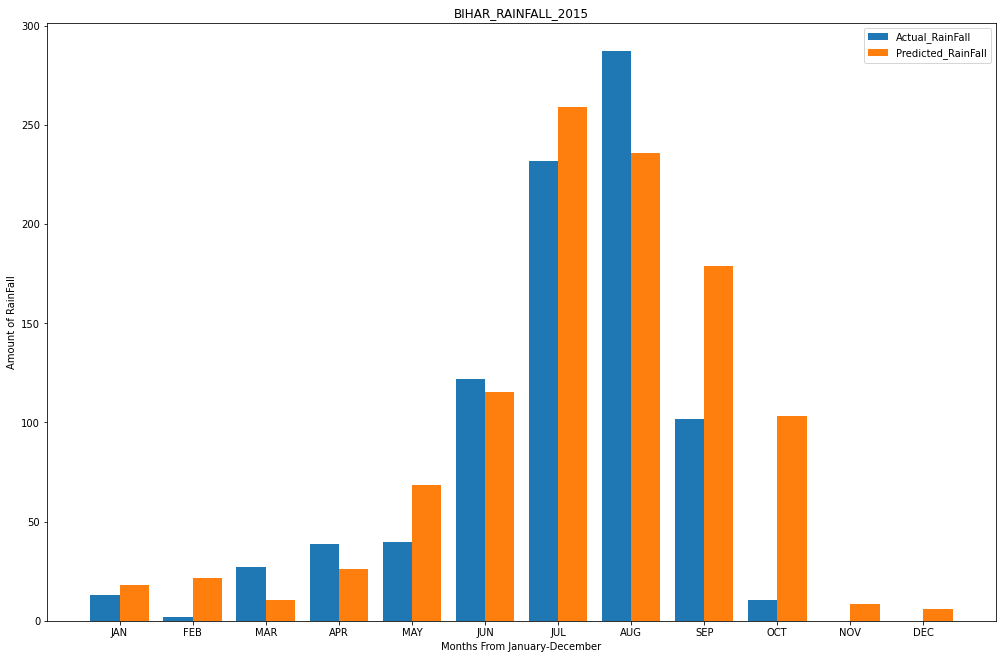

Mean of  Real rainfall in 2015: 72.72500000000001
Mean of predicted rainfall in 2015: 87.57663040847098
Std Dev of  Real rainfall in 2015: 92.11336425839629
Std Dev of  predicted rainfall in 2015: 87.93198957279411


In [ ]:
#we will use data of 2012,2013 and 2014 data for predicting rainfall of 2015
y_year_pred_2015 = reg.predict(X)
bar_plot(Y,y_year_pred_2015,"BIHAR_RAINFALL_2015")
print("Mean of  Real rainfall in 2015:",np.mean(Y))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(Y)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))

In [109]:
#Artificial Neural Network
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 3, 64)             192       
                                                                 
 conv1d_7 (Conv1D)           (None, 3, 128)            16512     
                                                                 
 flatten_3 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               49280     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080

In [110]:
model.fit(x=np.expand_dims(tf.convert_to_tensor(X_train),axis=2), y=tf.convert_to_tensor(y_train), batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
y_pred_2015= model.predict(np.expand_dims(X, axis=2))
Y=np.array(Y)
y_pred_2015=np.array(y_pred_2015)
mean_absolute_error(Y, y_pred_2015)

Epoch 1/10
15/15 [==============================] - 1s 18ms/step - loss: 10736.1562 - mae: 60.7968 - val_loss: 5561.4482 - val_mae: 49.2901
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 4904.4624 - mae: 44.8322 - val_loss: 3655.7454 - val_mae: 38.8871
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 4162.9668 - mae: 41.0090 - val_loss: 3130.8259 - val_mae: 37.0708
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 3819.4529 - mae: 39.1672 - val_loss: 3095.3735 - val_mae: 36.4365
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 3833.5579 - mae: 39.3818 - val_loss: 3100.7717 - val_mae: 36.0920
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 3704.5110 - mae: 38.5670 - val_loss: 3200.1841 - val_mae: 37.0454
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 3778.4473 - mae: 38.7688 - val_loss: 3142.1343 - val_mae: 36.1274
Epoch 8/10
15/15 [==============

29.779170372088753

In [111]:
#creating csv file of predicted and actual rainfall of 2015 
# get the list of tuples from two lists.
# and merge them by using zip().
Y=Y.tolist();y_pred_2015=y_pred_2015.tolist()
list_of_tuples = list(zip(Y, y_pred_2015))
# Assign data to tuples.
# Converting lists of tuples into
# pandas Dataframe.
Artificial_neural_network_model_df= pd.DataFrame(list_of_tuples, columns = ['Actual_Rainfall_2015', 'Predicted_Rainfall_2015'])
# Print data.
Month=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']
Artificial_neural_network_model_df['MONTH']=Month
Artificial_neural_network_model_df


,Actual_Rainfall_2015,Predicted_Rainfall_2015,MONTH
0,12.8,[18.29995346069336],JAN
1,1.8,[22.70990562438965],FEB
2,27.2,[7.916030406951904],MAR
3,38.7,[32.00082015991211],APR
4,39.5,[78.02717590332031],MAY
5,122.1,[128.1692657470703],JUN
6,231.5,[270.1839904785156],JUL
7,287.0,[258.5453186035156],AUG
8,101.7,[186.45761108398438],SEP
9,10.4,[111.37576293945312],OCT


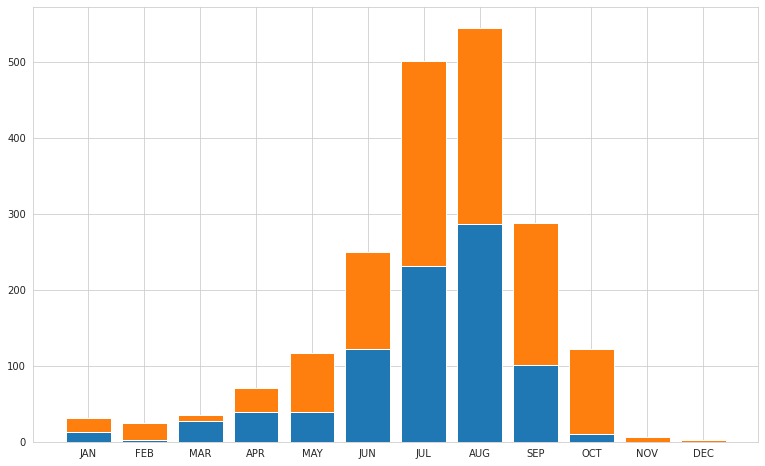

In [113]:
#we can stack bars on top of one another. We use the bottom argument of plt.bar to achieve this.
plt.figure(figsize=(13, 8))
plt.bar(Artificial_neural_network_model_df.MONTH,Artificial_neural_network_model_df.Actual_Rainfall_2015)
plt.bar(Artificial_neural_network_model_df.MONTH,Artificial_neural_network_model_df.Predicted_Rainfall_2015, bottom=Artificial_neural_network_model_df.Actual_Rainfall_2015);

<Figure size 792x576 with 0 Axes>

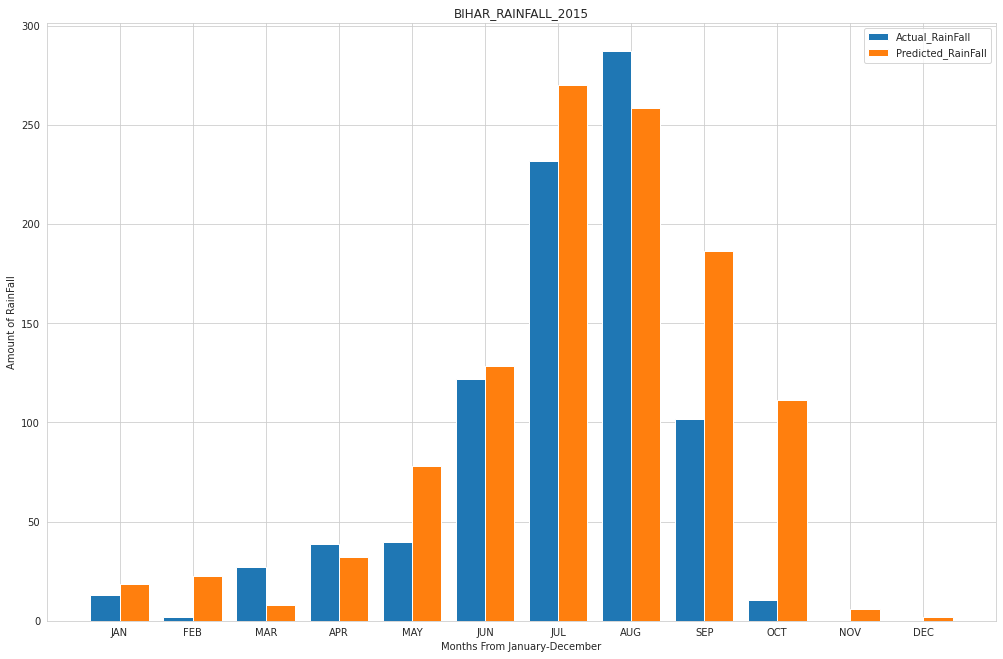

Mean of  Real rainfall in 2015: 72.72500000000001
Mean of predicted rainfall in 2015: 93.43119856715202
Std Dev of  Real rainfall in 2015: 92.11336425839629
Std Dev of  predicted rainfall in 2015: 94.31862299562731


In [116]:
#we will use data of 2012,2013 and 2014 data for predicting rainfall of 2015 using ANN MODEL 
plt.figure(figsize=(11, 8))
bar_plot(Artificial_neural_network_model_df.Actual_Rainfall_2015,Artificial_neural_network_model_df.Predicted_Rainfall_2015,"BIHAR_RAINFALL_2015")
print("Mean of  Real rainfall in 2015:",np.mean(Y))
print("Mean of predicted rainfall in 2015:",np.mean(y_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(Y)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_pred_2015)))

In [34]:
#Deep neural multilayer perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [37]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=42, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)
mean_absolute_error(y_test, y_pred)

39.22714244427081

In [38]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X)
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=42, max_iter=2000).fit(X_trainscaled, y_train)
y_year_pred_2015=reg.predict(X_testscaled)



In [43]:
y_year_pred_2015


array([ 12.80164606,  21.68361601,   7.14374703,  16.56738869,
        50.23793628, 167.83145363, 290.14925729, 277.86806792,
       214.39697816, 117.58081691,   4.51983561,   3.95294076])

In [42]:
Y=np.array(Y)
Y

array([ 12.8,   1.8,  27.2,  38.7,  39.5, 122.1, 231.5, 287. , 101.7,
        10.4,   0. ,   0. ])

In [46]:
#creating csv file of predicted and actual rainfall of 2015 
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(Y, y_year_pred_2015))
# Assign data to tuples.
list_of_tuples 
# Converting lists of tuples into
# pandas Dataframe.
multilayer_perceptron_model_df= pd.DataFrame(list_of_tuples, columns = ['Actual_Rainfall_2015', 'Predicted_Rainfall_2015'])
# Print data.
Month=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']
multilayer_perceptron_model_df['MONTH']=Month
multilayer_perceptron_model_df

,Actual_Rainfall_2015,Predicted_Rainfall_2015,MONTH
0,12.8,12.801646,JAN
1,1.8,21.683616,FEB
2,27.2,7.143747,MAR
3,38.7,16.567389,APR
4,39.5,50.237936,MAY
5,122.1,167.831454,JUN
6,231.5,290.149257,JUL
7,287.0,277.868068,AUG
8,101.7,214.396978,SEP
9,10.4,117.580817,OCT


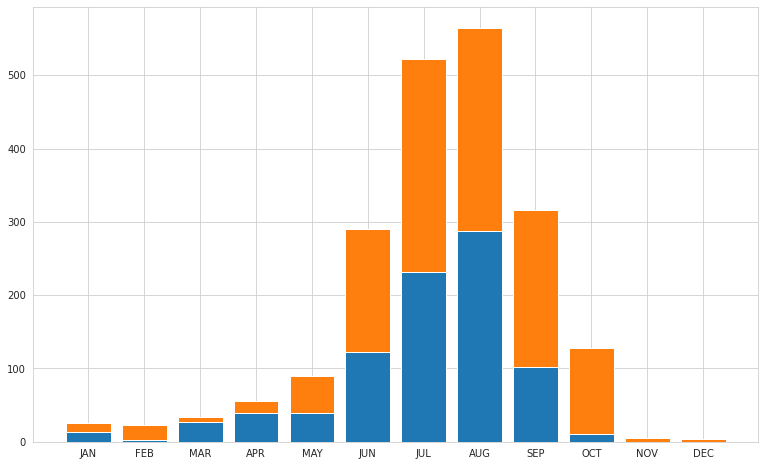

In [52]:
#we can stack bars on top of one another. We use the bottom argument of plt.bar to achieve this.
plt.figure(figsize=(13, 8))
plt.bar(multilayer_perceptron_model_df.MONTH,multilayer_perceptron_model_df.Actual_Rainfall_2015)
plt.bar(multilayer_perceptron_model_df.MONTH, multilayer_perceptron_model_df.Predicted_Rainfall_2015, bottom=multilayer_perceptron_model_df.Actual_Rainfall_2015);

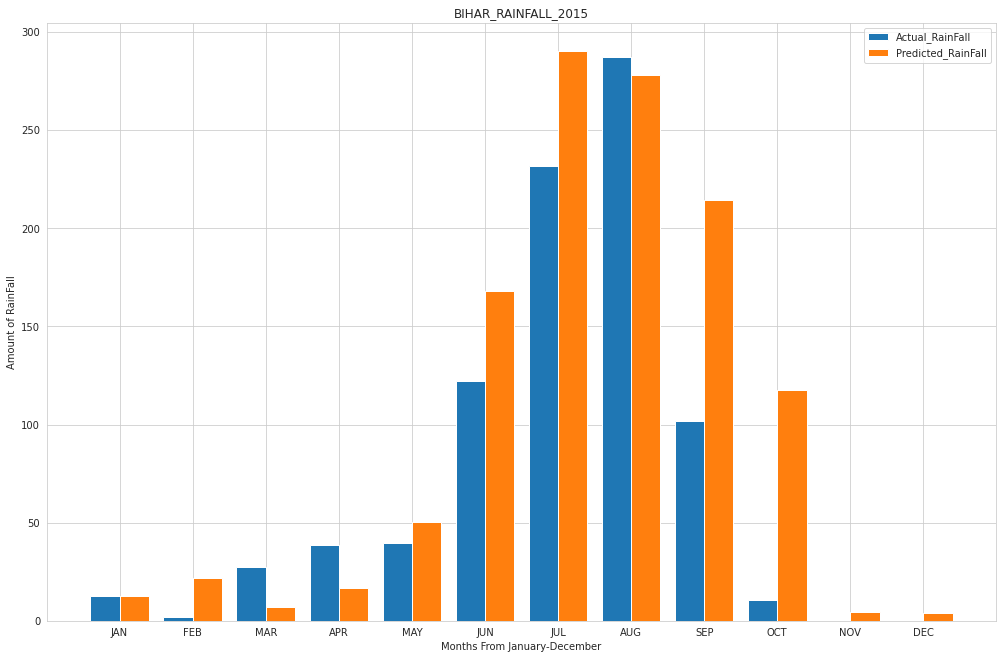

Mean of  Real rainfall in 2015: 72.72500000000001
Mean of predicted rainfall in 2015: 98.7278070300356
Std Dev of  Real rainfall in 2015: 92.11336425839629
Std Dev of  predicted rainfall in 2015: 106.42261798065937


In [41]:
#we will use data of 2012,2013 and 2014 data for predicting rainfall of 2015
bar_plot(Y,y_year_pred_2015,"BIHAR_RAINFALL_2015")
print("Mean of  Real rainfall in 2015:",np.mean(Y))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(Y)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))

In [53]:
#SVM MODEL
#Training And Testing on Bihar Rainfall Data
from sklearn.svm import SVR
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

95.63322863741834

In [54]:
#Training data on Bihar data
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [55]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
mean_absolute_error(y_test, Y_pred)

41.61604032459426

In [56]:
#Testing on 2015 data
Y_pred_2015 = regressor.predict(X)  # test the output by changing values
mean_absolute_error(Y, Y_pred_2015)

41.61200000000003

In [58]:
#creating csv file of predicted and actual rainfall of 2015  using Random Forest Regression
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(Y, Y_pred_2015))
# Assign data to tuples.
list_of_tuples 
# Converting lists of tuples into
# pandas Dataframe.
randomforest_regression_model_df= pd.DataFrame(list_of_tuples, columns = ['Actual_Rainfall_2015', 'Predicted_Rainfall_2015'])
# Print data.
Month=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']
randomforest_regression_model_df['MONTH']=Month
randomforest_regression_model_df

,Actual_Rainfall_2015,Predicted_Rainfall_2015,MONTH
0,12.8,18.596,JAN
1,1.8,32.063,FEB
2,27.2,9.379,MAR
3,38.7,11.566,APR
4,39.5,48.558,MAY
5,122.1,185.725,JUN
6,231.5,303.167,JUL
7,287.0,269.520,AUG
8,101.7,242.631,SEP
9,10.4,122.252,OCT


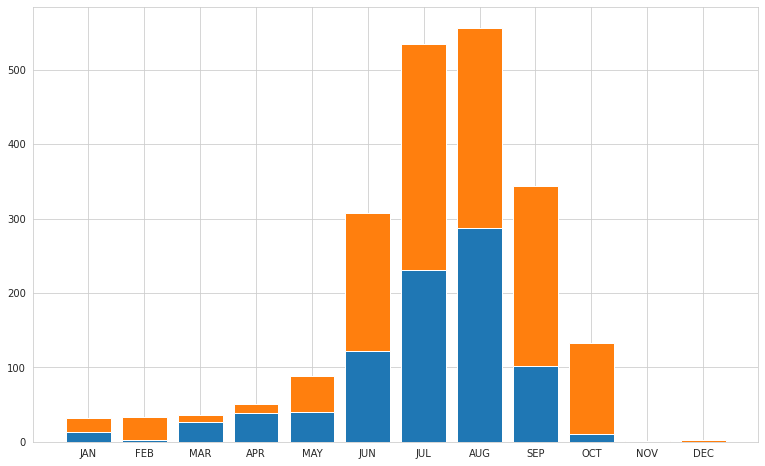

In [59]:
#we can stack bars on top of one another. We use the bottom argument of plt.bar to achieve this.
plt.figure(figsize=(13, 8))
plt.bar(randomforest_regression_model_df.MONTH,randomforest_regression_model_df.Actual_Rainfall_2015)
plt.bar(randomforest_regression_model_df.MONTH, randomforest_regression_model_df.Predicted_Rainfall_2015, bottom=randomforest_regression_model_df.Actual_Rainfall_2015);

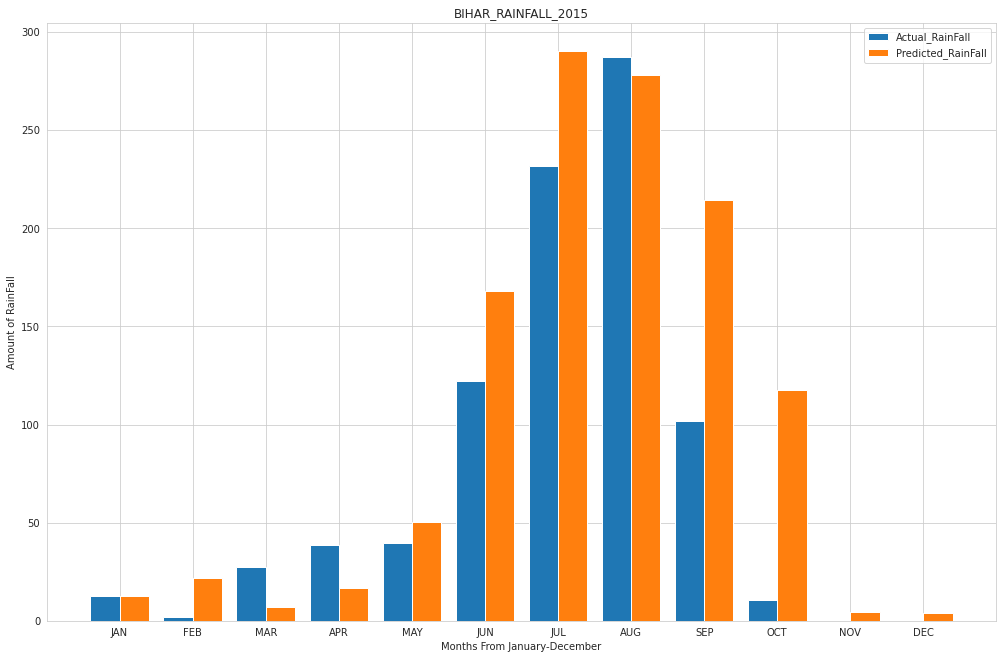

Mean of  Real rainfall in 2015: 72.72500000000001
Mean of predicted rainfall in 2015: 98.7278070300356
Std Dev of  Real rainfall in 2015: 92.11336425839629
Std Dev of  predicted rainfall in 2015: 106.42261798065937


In [60]:
#we will use data of 2012,2013 and 2014 data for predicting rainfall of 2015
bar_plot(Y,y_year_pred_2015,"BIHAR_RAINFALL_2015")
print("Mean of  Real rainfall in 2015:",np.mean(Y))
print("Mean of predicted rainfall in 2015:",np.mean(y_year_pred_2015))
print("Std Dev of  Real rainfall in 2015:",np.sqrt(np.var(Y)))
print("Std Dev of  predicted rainfall in 2015:",np.sqrt(np.var(y_year_pred_2015)))